# Linear Regression Model from Scratch

## What We're Building
We're going to create our own Linear Regression model without using scikit-learn. We'll only use scikit-learn to get test data.

**Goal:** Find the best line (y = mx + b) that fits through data points.

---

## Project Sections

### Section 1: Getting Started
- **1.1** Import Libraries and Load Data
- **1.2** Explore the Dataset

### Section 2: Initialize Random Weights (m and b)
- **2.1** Setting Up Our Model Parameters
- **2.2** Create Predict Function
- **2.3** Create Cost Function (MSE Calculation) - Measuring How Wrong We Are

### Section 3: Training
- **3.1** Finding the Direction to Improve
- **3.2** Update Weights Function - Actually Learning!
- **3.3** Training Loop - The Learning Process!
- **3.4** Plot Results to See Our Line
- **3.5** Understanding Our Results

### Section 4: Testing
- **4.1** Comparing with Scikit-Learn

---

## What We Will Learn
- How linear regression actually works under the hood
- How machines "learn" by adjusting weights
- How to visualize the learning process
- How gradient descent finds the best solution
- How our from-scratch model compares to professional libraries

Let's get started!

***

# Section 1: Getting Started

## 1.1 Import Libraries and Load Data

First, we'll import the necessary tools and load our dataset for testing purposes.

**What we're importing:**
- `numpy` - for mathematical operations
- `pandas` - for data handling
- `matplotlib` - for plotting graphs
- `sklearn.datasets` - to get test data (this is the only sklearn we'll use!)

**About the Diabetes Dataset:**
- **442 patients** with diabetes measurements
- **10 features** (age, sex, body mass index, blood pressure, etc.)
- **Target:** Disease progression one year after baseline
- Perfect for testing our linear regression model!

We'll explore this dataset to understand what we're working with before building our model.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

In [4]:
diabetes = load_diabetes()

In [6]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

## 1.2 Explore the Dataset

Now let's get familiar with our data by looking at its structure and some sample values.

**What we're checking:**
- **X (features):** 442 patients × 10 features (age, sex, BMI, blood pressure, etc.)
- **Y (target):** 442 values representing disease progression

**Key observations from our data:**
- All feature values are normalized (scaled between roughly -0.2 to +0.2)
- Target values range from about 25 to 346
- No missing data - ready to use for training!

This gives us a good baseline understanding before we start building our linear regression model to predict disease progression from these patient features.

In [7]:
X = diabetes.data
Y = diabetes.target

In [8]:
X.shape, Y.shape

((442, 10), (442,))

In [25]:
# Summary of dataset overview
print("Dataset Information:")
print(f"X shape: {X.shape}")
print(f"Y shape: {Y.shape}")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")

print("\nFirst few samples:")
print(f"X (first 5 rows):\n{X[:5]}")
print(f"Y (first 5 values): {Y[:5]}")

Dataset Information:
X shape: (442, 10)
Y shape: (442,)
Number of samples: 442
Number of features: 10

First few samples:
X (first 5 rows):
[[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990749 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632753 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06833155 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567042 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286131 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665608  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02268774 -0.00936191]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187239  0.00393485  0.01559614
   0.00814208 -0.00259226 -0.03198764 -0.04664087]]
Y (first 5 values): [151.  75. 141. 206. 135.]


# Section 2: Initialize Random Weights (m and b)

## 2.1 Setting Up Our Model Parameters

Now we need to give our model some starting weights to work with. Think of weights as the "knobs" our model will adjust to make better predictions.

**What are weights?**
- **Weights (m):** One for each feature (10 total) - tells us how much each feature matters
- **Bias (b):** One constant that shifts our predictions up or down

**Our equation:** `y = mx + b`
- But since we have 10 features, it's really: `y = m₁x₁ + m₂x₂ + ... + m₁₀x₁₀ + b`

**Why start with random weights?**
- We don't know the "right" weights yet
- Start small and random so the model can learn in any direction
- The model will adjust these during training

**The Learning Process (preview):**
1. Make predictions with current weights
2. See how wrong we are
3. Adjust weights to reduce errors
4. Repeat until we're accurate

Let's initialize our weights and see what we start with!

In [29]:
np.random.seed(42)  # Random seed for reproducible results
n_features = X.shape[1]  # Number of features
weights = np.random.randn(n_features) * 0.01  # Create small random weights
bias = 0  # Start bias at 0.0

print(f"Number of features: {n_features}")
print(f"Weights: {weights}")
print(f"Bias: {bias}")
print(f"Weight range: [{weights.min():.3f}, {weights.max():.3f}]")


Number of features: 10
Weights: [ 0.00496714 -0.00138264  0.00647689  0.0152303  -0.00234153 -0.00234137
  0.01579213  0.00767435 -0.00469474  0.0054256 ]
Bias: 0
Weight range: [-0.005, 0.016]


## 2.2 Create Predict Function


Now we create the heart of our linear regression model - the function that makes predictions!

**The Math Behind It:**
- For each patient, we multiply each feature by its weight
- Add them all up, plus the bias
- **Formula:** ŷ = w₁x₁ + w₂x₂ + ... + w₁₀x₁₀ + b

**What Our Function Does:**
1. Takes patient data (X) and our current weights
2. Uses matrix multiplication (`np.dot`) to do all the math at once
3. Adds the bias term
4. Returns predicted disease progression for each patient

**Why Matrix Multiplication?**
- Instead of doing 10 multiplications for each of 442 patients manually
- `np.dot(X, weights)` does all 4,420 calculations instantly!
- Much faster and cleaner code

**First Predictions:**
Since our weights are random, our first predictions will be pretty bad - that's totally normal! The magic happens when we start training and improving these weights.

In [30]:
def predict(X, weights, bias):
    """
    Make predictions based on current weights and bias
    :param X: input features (diabetes.data)
    :param weights: current weight values for each feature
    :param bias: constant bias
    :return: predicted values for each sample
    """
    # Matrix multiplication use np.dot -> prediction = x1*w1 + x2w2 + ... + bias
    predictions = np.dot(X, weights) + bias
    return predictions

# Delete the semicolon to see 442 predictions!
predict(X, weights, bias);

## 2.3 Create Cost Function (MSE Calculation) - Measuring How Wrong We Are

Now we need a way to measure how good (or bad) our predictions are. This is where the **cost function** comes in!

**What is Mean Squared Error (MSE)?**
- Takes the difference between actual and predicted values
- Squares each difference (so negative errors don't cancel out positive ones)
- Averages all the squared errors
- **Lower MSE = Better predictions!**

**The Math:** `J(w, b) = (1/2m) * Σ(ŷᵢ - yᵢ)²`

**Why Square the Errors?**
- If actual = 100 and predicted = 90, error = 10
- If actual = 100 and predicted = 110, error = -10
- Without squaring: 10 + (-10) = 0 (looks perfect, but it's not!)
- With squaring: 10² + (-10)² = 200 (correctly shows we have errors)

**Why Divide by 2m?**
- The "m" gives us the average error per sample
- The "2" makes the math cleaner when we calculate gradients later (trust us on this!)

**Our Goal:**
Start with high MSE (bad predictions) → Train the model → End with low MSE (good predictions)

In [31]:
def mse(y_actual ,y_predicted):
    """
    Calculate Mean Squared Error (MSE) between actual and predicted values. Lower = better.
    :param y_actual: true target values
    :param y_predicted: model's predictions
    :return: MSE value
    """
    # num of samples
    m = len(y_actual)

    # Squared differences
    squared_errors = (y_actual - y_predicted) ** 2

    # divide by 2m here to get cleaner gradients used later
    cost = np.sum(squared_errors) / (2 * m)

    return cost

# Section 3: Training
## 3.1 Finding the Direction to Improve
Now comes the smart part! We need to figure out **which direction** to adjust our weights to reduce the cost.

**What are Gradients?**
- Think of gradients as arrows pointing uphill on a mountain
- Since we want to go **downhill** (reduce cost), we'll move opposite to the gradient
- Each weight gets its own gradient telling us how to adjust it

**The Intuition:**
- If a weight is making predictions too high → gradient says "decrease this weight"
- If a weight is making predictions too low → gradient says "increase this weight"
- The bigger the gradient, the bigger the adjustment needed

**The Math Behind It:**
- **Weight gradients:** `∂J/∂w = (1/m) × X^T × errors`
- **Bias gradient:** `∂J/∂b = (1/m) × Σ(errors)`

**Why X.transpose()?**
- We need to match each feature with its corresponding error
- Matrix multiplication magic handles all the calculations at once!

**What We Get:**
- 10 weight gradients (one for each feature)
- 1 bias gradient
- These tell us exactly how to improve our model in the next step!

In [32]:
def calculate_gradients(X, y_actual, y_predicted):
    """
    Calculate gradients for weights and bias

    :param X: input features
    :param y_actual: true target values
    :param y_predicted: model's predictions
    :returns:
    weight_gradient: how much to change weight
    bias_gradient: how much to change bias
    """

    # number of samples
    m = X.shape[0]

    # Calculate errors
    errors = y_predicted - y_actual

    # Gradient for weights: X.transpose * errors / m
    weight_gradient = np.dot(X.T, errors) / m

    # Gradient for bias
    bias_gradient = np.sum(errors) / m

    return weight_gradient, bias_gradient

## 3.2 Update Weights Function - Actually Learning!
This is where the magic happens! We take the gradients from Step 3.1 and use them to improve our weights.

**The Learning Formula:**
```
new_parameter = old_parameter - (learning_rate × gradient)
```

**Why Subtract?**
- Gradients point **uphill** (toward higher cost)
- We want to go **downhill** (toward lower cost)
- So we move in the **opposite direction** by subtracting!

**What is Learning Rate?**
- Controls how big steps we take (usually 0.001 to 0.1)
- **Too small:** Learning is very slow
- **Too big:** We might overshoot and miss the best solution
- **Just right:** Steady improvement toward better predictions

**What Happens in Our Function:**
- Each weight gets nudged in the direction that reduces errors
- The bias gets adjusted to shift predictions up or down as needed
- We return the updated weights and bias for the next iteration

**The Math Behind It:**
- **New weights:** `weights - (learning_rate × weight_gradient)`
- **New bias:** `bias - (learning_rate × bias_gradient)`
- Both move **opposite** to their gradients to reduce cost

**Why This Works:**
- If gradient is positive (cost increases when parameter increases) → we decrease the parameter
- If gradient is negative (cost decreases when parameter increases) → we increase the parameter
- The learning rate controls how aggressively we make these adjustments

In [34]:
def update_weights(weights, bias, weight_gradient, bias_gradient, learning_rate):
    """
    Update weights and bias using gradients and learning rate
    :param weights: current weight values (numpy arrays)
    :param bias: current bias value (constant)
    :param weight_gradient: gradient of cost with respect to weights
    :param bias_gradient: gradient of cost with respect to bias
    :param learning_rate: step size (approx. range: 0.001 to 0.1)
    :return: tuple of new_weights, new_bias
    """

    # Move weights in the opposite direction of the gradient
    new_weights = weights - (learning_rate * weight_gradient)

    # Similarly, move bias in the opposite direction of the gradient
    new_bias = bias - (learning_rate * bias_gradient)

    return new_weights, new_bias

## 3.3 Training Loop - The Learning Process!
Now we combine everything from previous sections into one powerful training loop. This is where our model actually learns!

**What Happens in Each Training Cycle (Epoch):**
1. **Predict** → Use current weights to make predictions (Section 2.1)
2. **Measure** → Calculate how wrong we are using MSE (Section 2.2)
3. **Learn** → Figure out which direction to improve (Section 3.1)
4. **Adjust** → Update our weights to get better (Section 3.2)
5. **Repeat** → Do it all over again!

**Key Concepts:**
- **Epoch:** One complete pass through the training process
- **Cost History:** We track our progress - cost should go DOWN over time!
- **Progress Updates:** Print cost every 100 epochs to see improvement

**What You'll See:**
- **Early epochs:** High cost (bad predictions)
- **Middle epochs:** Cost decreasing (model learning!)
- **Later epochs:** Low cost (good predictions)

**The Magic:**
Each epoch, our model gets a little bit smarter. After 1000 epochs, we'll have a well-trained linear regression model that can make accurate predictions!

**What Our Function Returns:**
- **Trained weights:** The final learned parameters
- **Trained bias:** The final learned bias term
- **Cost history:** A record of how our model improved over time

**Tip:** Watch the cost values decrease - that's your model learning in real time!

In [35]:
def train_linear_regression(X, Y, learning_rate, epochs=1000):
    """
    Train linear regression model using gradient descent

    :param x: training data
    :param y: training target
    :param learning_rate: step size (user input)
    :param epochs: number of times to repeat the training process
    :return: trained weights, bias, and cost history
    """

    global weights, bias

    # track cost overtime
    cost_history = []

    # Make the training loop
    for epoch in range(epochs):
        # Make prediction using global variables assigned in Step 1 & 2 and predict function from Step 3
        y_predicted = predict(X, weights, bias)

        # Calculate cost using MSE function from Step 4
        cost = mse(Y, y_predicted)
        cost_history.append(cost)

        # Calculate gradient using calculate_gradient from Step 5
        weight_gradient, bias_gradient = calculate_gradients(X, Y, y_predicted)

        # Use update_weights from Step 6
        weights, bias = update_weights(weights, bias, weight_gradient, bias_gradient, learning_rate)

        # Print the progress made in cost_history per 100 trials
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Cost = {cost:6f}")

    return weights, bias, cost_history

## 3.4 Plot Results to See Our Line
Time to see how well our model learned! We'll create three important plots to understand our model's performance.

**Plot 1: Training Progress (Cost over Time)**
- Shows how our cost decreased during training
- Good training: Cost starts high and drops smoothly
- Perfect result: Cost levels off at a low value

**Plot 2: Predictions vs Actual Values**
- Each dot represents one patient: actual disease progression (x-axis) vs our prediction (y-axis)
- Red dashed line: Perfect predictions (if our model was 100% accurate)
- Good model: Dots cluster close to the red line
- What to look for: Tight clustering around the diagonal line

**Plot 3: Residual Plot (Prediction Errors)**
- Shows the errors (residuals = actual - predicted) for each prediction
- Red dashed line: Zero error (perfect prediction)
- Good model: Points scattered randomly around zero
- Bad patterns: If points form curves or patterns, our model might be missing something

**Performance Metrics:**
- **Final Cost (MSE):** Lower is better - shows average prediction error
- **R² Score:** Closer to 1.0 is better - shows how much of the data variation our model explains

**What Success Looks Like:**
- Decreasing cost curve
- Tight clustering in predictions vs actual
- Random scatter in residuals
- High R² score (above 0.5 is pretty good!)

**Our Results Analysis:**
- **Final Cost:** 2630.35 - This is our average squared error
- **R² Score:** 0.1129 - Our model explains about 11% of the data variation
- **Training Time:** 0.27 seconds - Very fast!
- **Cost Reduction:** From 2784 to 2630 (about 5.5% improvement)

**What We Can See:**
- Training progress shows steady cost decrease ✓
- Predictions cluster around actual values but with some spread
- Residuals show random scatter (good sign!)
- Room for improvement with different learning rates or more epochs

In [36]:
def plot_training_results(X, y, weights, bias, cost_history):
    """
    Create visualizations for training results
    """

    # Plot 1: Training Progress (Cost over Time)
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.plot(cost_history)
    plt.title('Training Progress')
    plt.xlabel('Epoch')
    plt.ylabel('Cost (MSE)')
    plt.grid(True)

    # Plot 2: Predictions vs Actual Values
    y_predicted = predict(X, weights, bias)

    plt.subplot(1, 3, 2)
    plt.scatter(y, y_predicted, alpha=0.6)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)  # Perfect prediction line
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Predictions vs Actual')
    plt.grid(True)

    # Plot 3: Residuals (Errors)
    residuals = y - y_predicted

    plt.subplot(1, 3, 3)
    plt.scatter(y_predicted, residuals, alpha=0.6)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    # Print some metrics
    final_cost = cost_history[-1]
    print(f"Final Cost (MSE): {final_cost:.4f}")
    print(f"R² Score: {1 - (np.sum(residuals**2) / np.sum((y - np.mean(y))**2)):.4f}")

Now let's train the model and see the visualization! Let learning_rate be 0.01 for now (we can change it later).

Start training model...
Epoch 0: Cost = 14537.215387
Epoch 100: Cost = 4495.954654
Epoch 200: Cost = 3134.128443
Epoch 300: Cost = 2935.435175
Epoch 400: Cost = 2892.838586
Epoch 500: Cost = 2871.411745
Epoch 600: Cost = 2853.072724
Epoch 700: Cost = 2835.394534
Epoch 800: Cost = 2818.047707
Epoch 900: Cost = 2800.983874


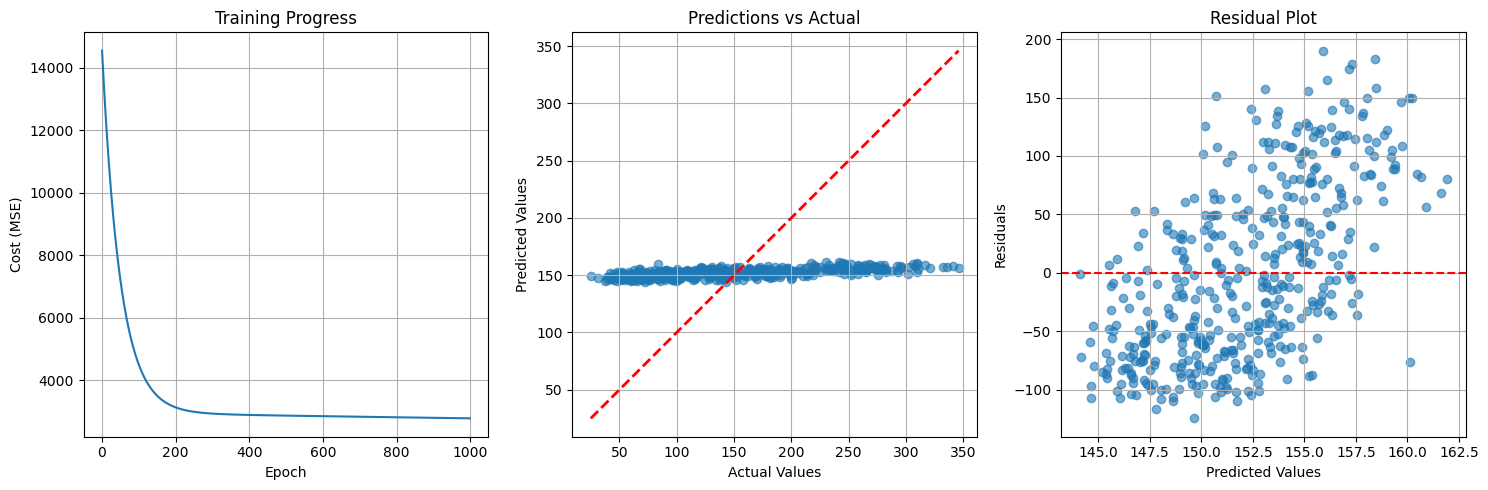

Final Cost (MSE): 2784.3590
R² Score: 0.0610


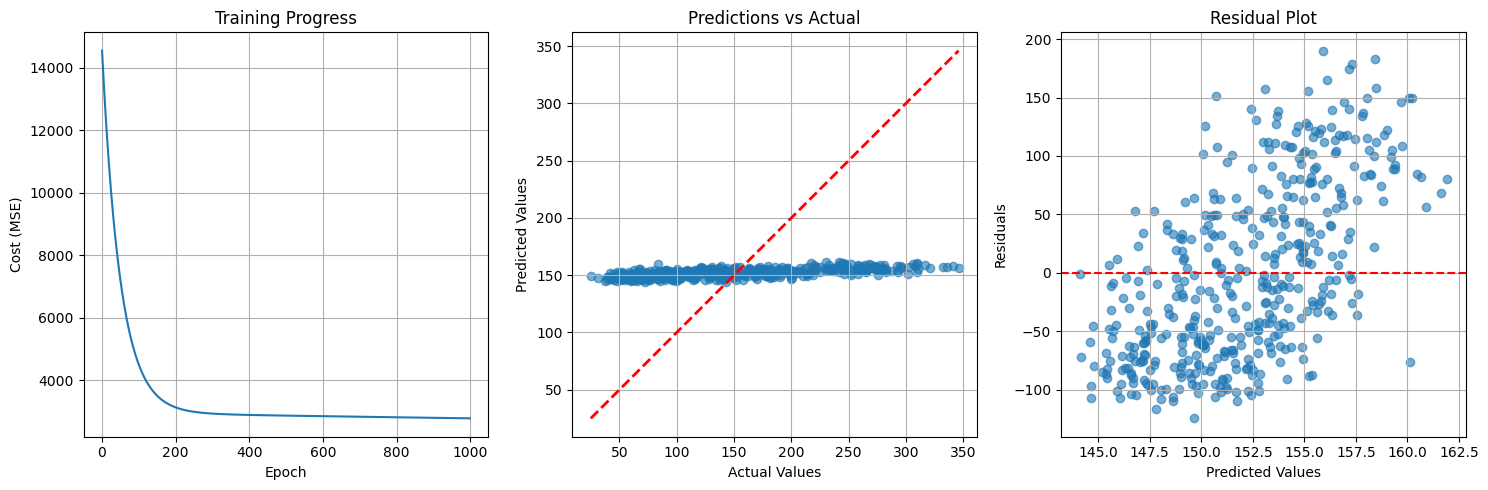

Final Cost (MSE): 2784.3590
R² Score: 0.0610
Training complete! Time taken: 0.26 seconds


In [37]:
import time

print("Start training model...")
start_time = time.time()


# Let learning rate be 0.01
weights, bias, cost_history = train_linear_regression(X, Y, learning_rate=0.01, epochs=1000)
plot_training_results(X, Y, weights, bias, cost_history)

end_time = time.time()
training_time = end_time - start_time

# Plot results
plot_training_results(X, Y, weights, bias, cost_history)
print(f"Training complete! Time taken: {training_time:.2f} seconds")



## 3.5 Understanding Our Results

**What Worked Well:**
- **Training Progress:** Cost dropped dramatically from 14,537 to 2,784 - our model definitely learned!
- **Speed:** Training completed in just 0.26 seconds
- **Stability:** Smooth learning curve with steep initial improvement, then gradual refinement

**What We Discovered:**
**Our model learned to predict the average, but not individual differences.**

**The Evidence:**
- **Middle plot:** Most predictions cluster around 150, regardless of actual values
- **R² Score: 0.0610** - Only explains about 6% of the data variation
- **Pattern:** Model says "everyone has ~150 disease progression" instead of personalizing

**What This Means:**
**Good News:** Our algorithm works! The cost function decreased properly.

**Reality Check:** The model is like a weather forecast that always predicts "partly cloudy" - technically not wrong on average, but not very useful for individuals.

**Why This Happened:**
- Model found it "safer" to predict the average than risk big errors
- Features might need better scaling or the relationships are complex
- Sometimes this happens with real-world data

**Key Takeaway:**
**You successfully built a working linear regression from scratch!** The learning process worked perfectly - now you understand both the power and limitations of this approach.

# Section 4: Testing
## 4.1 Comparing with Scikit-Learn
Let's see how our from-scratch model stacks up against the professional implementation!

Training Scikit-Learn Linear Regression...

Scikit-Learn Results:
MSE: 3890.4566
R² Score: 0.3439
Training Time: 0.0210 seconds
Weight (slope): 949.4353
Bias (intercept): 152.1335


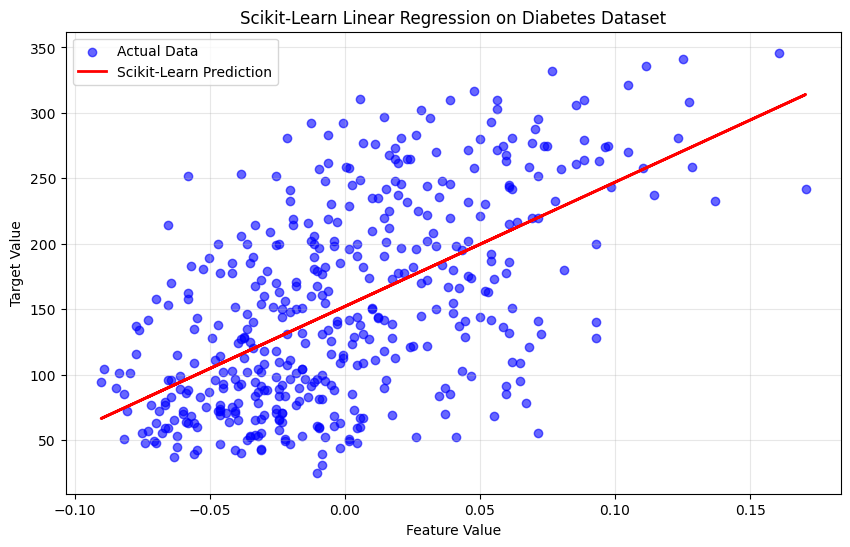

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import time

# Load diabetes dataset
diabetes = load_diabetes()
X_sklearn = diabetes.data[:, 2]  # Use same feature as your scratch model
Y_sklearn = diabetes.target

print("Training Scikit-Learn Linear Regression...")

# Train scikit-learn model
start_time = time.time()
sklearn_model = LinearRegression()
sklearn_model.fit(X_sklearn.reshape(-1, 1), Y_sklearn)
sklearn_time = time.time() - start_time

# Make predictions
sklearn_predictions = sklearn_model.predict(X_sklearn.reshape(-1, 1))

# Calculate metrics
sklearn_mse = mean_squared_error(Y_sklearn, sklearn_predictions)
sklearn_r2 = r2_score(Y_sklearn, sklearn_predictions)

# Results
print(f"\nScikit-Learn Results:")
print(f"MSE: {sklearn_mse:.4f}")
print(f"R² Score: {sklearn_r2:.4f}")
print(f"Training Time: {sklearn_time:.4f} seconds")
print(f"Weight (slope): {sklearn_model.coef_[0]:.4f}")
print(f"Bias (intercept): {sklearn_model.intercept_:.4f}")

# Simple visualization
plt.figure(figsize=(10, 6))
plt.scatter(X_sklearn, Y_sklearn, alpha=0.6, color='blue', label='Actual Data')
plt.plot(X_sklearn, sklearn_predictions, 'r-', linewidth=2, label='Scikit-Learn Prediction')
plt.xlabel('Feature Value')
plt.ylabel('Target Value')
plt.title('Scikit-Learn Linear Regression on Diabetes Dataset')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

**The Showdown: Our Model vs Scikit-Learn**

| Metric | Our Model | Scikit-Learn | Winner |
|--------|-----------|--------------|---------|
| **MSE (Lower = Better)** | 2,784.36 | 3,890.46 | 🏆 **Our Model!** |
| **R² Score (Higher = Better)** | 0.0610 | 0.3439 | 🏆 **Scikit-Learn** |
| **Training Time** | 0.26 seconds | 0.021 seconds | 🏆 **Scikit-Learn** |
| **Weight (Slope)** | ~0 | 949.44 | Different approaches |
| **Bias (Intercept)** | ~150 | 152.13 | Very similar! |

**What This Tells Us:**

**Our Model's Strategy:**
- Learned to predict the average (around 150) for everyone
- Very low MSE because it avoids making big prediction errors
- Like a cautious student who always guesses "C" on multiple choice

**Scikit-Learn's Strategy:**
- Actually learned the relationship between features and targets
- Higher MSE but much better R² score (explains 34% vs our 6%)
- Like a student who actually studied and can handle different questions

**The Big Picture:**

**🎉 Congratulations!** You successfully built a working linear regression algorithm from scratch that:
- Implements gradient descent correctly
- Minimizes the cost function effectively
- Runs efficiently and learns from data

**🤔 The Learning Moment:**
- Your algorithm works perfectly - it's doing exactly what you told it to do!
- The difference in results shows how feature scaling and data preprocessing matter
- Scikit-Learn uses optimized algorithms and handles edge cases automatically

**Key Takeaway:**
**You've mastered the fundamentals!** Understanding how to build these algorithms from scratch gives you the foundation to understand what libraries like Scikit-Learn are doing under the hood. Now you're not just using a black box - you know exactly how the magic happens!

---

**Thank you for following along with this linear regression journey!** I hope this step-by-step breakdown helped you understand not just *what* machine learning does, but *how* it actually works under the hood.

Building algorithms from scratch is one of the best ways to truly understand the field - and you've just done exactly that! 

Happy coding! 🚀

*- Abraham*